# <a id='Libraries'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#008080;font-family:Helvetica, Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> Постановка проблемы 🎯 </p>


**Проблема.**
Каналы онлайн-бронирования отелей кардинально изменили возможности бронирования и поведение клиентов. Значительное количество бронирований отелей отменяется из-за отмен или неявки. Типичные причины отмен включают изменение планов, конфликты в расписании и т. д. Это часто облегчается возможностью сделать это бесплатно или, что предпочтительнее, по низкой цене, что выгодно для гостей отеля, но это менее желательный и, возможно, снижающий доход фактор для отелей.

**Решение.**
Построить модель классификации, которая сможет предсказать возможность отмены бронирования. Это позволит отелям заранее предпринять меры (например, предложить скидки для подтвержденных бронирований, перевести бронирования в менее востребованные даты или изменить ценовую политику).

# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#6A5ACD;font-family:Tahoma, Geneva, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> 📊 Основная информация о датасете 📈 </p>

*   ## Описание колонок в Hotel Reservations Dataset

1. **Booking_ID** — идентификатор бронирования (можно удалить, не влияет на предсказания).  
2. **no_of_adults** — количество взрослых гостей.  
3. **no_of_children** — количество детей.  
4. **no_of_weekend_nights** — количество ночей на выходных.  
5. **no_of_week_nights** — количество ночей в будни.  
6. **type_of_meal_plan** — выбранный тип питания (`Meal Plan 1`, `Meal Plan 2`, `Not Selected` и т. д.).  
7. **required_car_parking_space** — требуется ли парковочное место (0 — нет, 1 — да).  
8. **room_type_reserved** — тип номера, который забронировали (`Room_Type 1`, `Room_Type 2` и т. д.).  
9. **lead_time** — за сколько дней до заезда было сделано бронирование.  
10. **arrival_year** — год заезда.  
11. **arrival_month** — месяц заезда.  
12. **arrival_date** — день заезда.  
13. **market_segment_type** — тип клиента (`Online`, `Offline`, `Corporate` и т. д.).  
14. **repeated_guest** — является ли гость постоянным клиентом (0 — нет, 1 — да).  
15. **no_of_previous_cancellations** — сколько бронирований этот клиент отменил раньше.  
16. **no_of_previous_bookings_not_canceled** — сколько бронирований клиент совершил без отмены.  
17. **avg_price_per_room** — средняя цена номера.  
18. **no_of_special_requests** — количество специальных запросов (например, доп. кровать).  
19. **booking_status** — **целевая переменная** (классификация):  
   - `Canceled` — бронирование отменено.  
   - `Not_Canceled` — бронирование не отменено.  

# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF6347;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> 📊 Загрузка библиотек и датасета 📁 </p>

In [268]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [269]:
url = "https://raw.githubusercontent.com/AlexxxAI/ML_Project_1/refs/heads/master/Hotel_Reservations.csv"
df = pd.read_csv(url)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4682B4;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> Exploratory Data Analysis 📊 </p>

In [271]:
df.shape

(36275, 19)

In [272]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [274]:
df.describe(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [275]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
----------------------------------------------------------------------
type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------------------------------------------------------------------
room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
----------------------------------------------------------------------
market_segment_type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
----------------------------------------------------------------------
booking_status
['Not_Canceled' 'Canceled']
----------------------------------------------------------------------


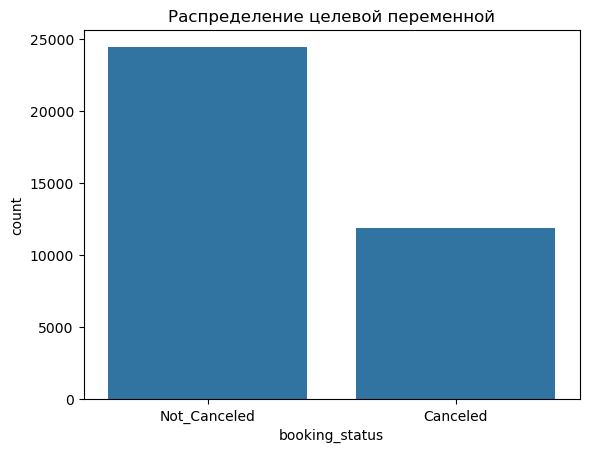

In [276]:
# Распределение целевой переменной
sns.countplot(x=df['booking_status'])
plt.title("Распределение целевой переменной")
plt.show()

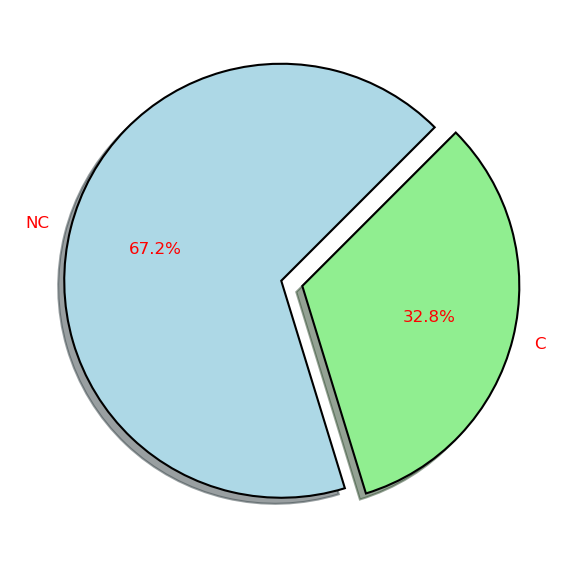

In [277]:
labels_ = ['NC', 'C']

plt.figure(figsize = (7, 8))

plt.pie(x = df['booking_status'].value_counts(), autopct = '%0.1f%%', colors = ['lightblue', 'lightgreen'],\
       startangle = 45 , labels = labels_, shadow = True, explode = (0.0, 0.1),\
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, textprops={'fontsize': 12, 'color': 'red'})
plt.show()

В датасете с целевой переменной booking_status соотношение классов составляет 67% для Non_canceled и 33% для Canceled, что указывает на дисбаланс классов. Учтем, что это может повлиять на точность модели, склонной предсказывать более частый класс.

In [279]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
            'market_segment_type', 'repeated_guest', 'booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'arrival_year','arrival_month','arrival_date','lead_time','no_of_previous_cancellations', 
          'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

## Num Feature

In [281]:
def num_plot_dist(df, num_features):
        fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
        if len(num_features) == 1:
            axes = [axes] 
        for i, column in enumerate(num_features):
            sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
            axes[i][0].set_title(f'Histogram with KDE for {column}')
            
            sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
            axes[i][1].set_title(f'Box Plot for {column}')
        
        plt.tight_layout()
        plt.show()

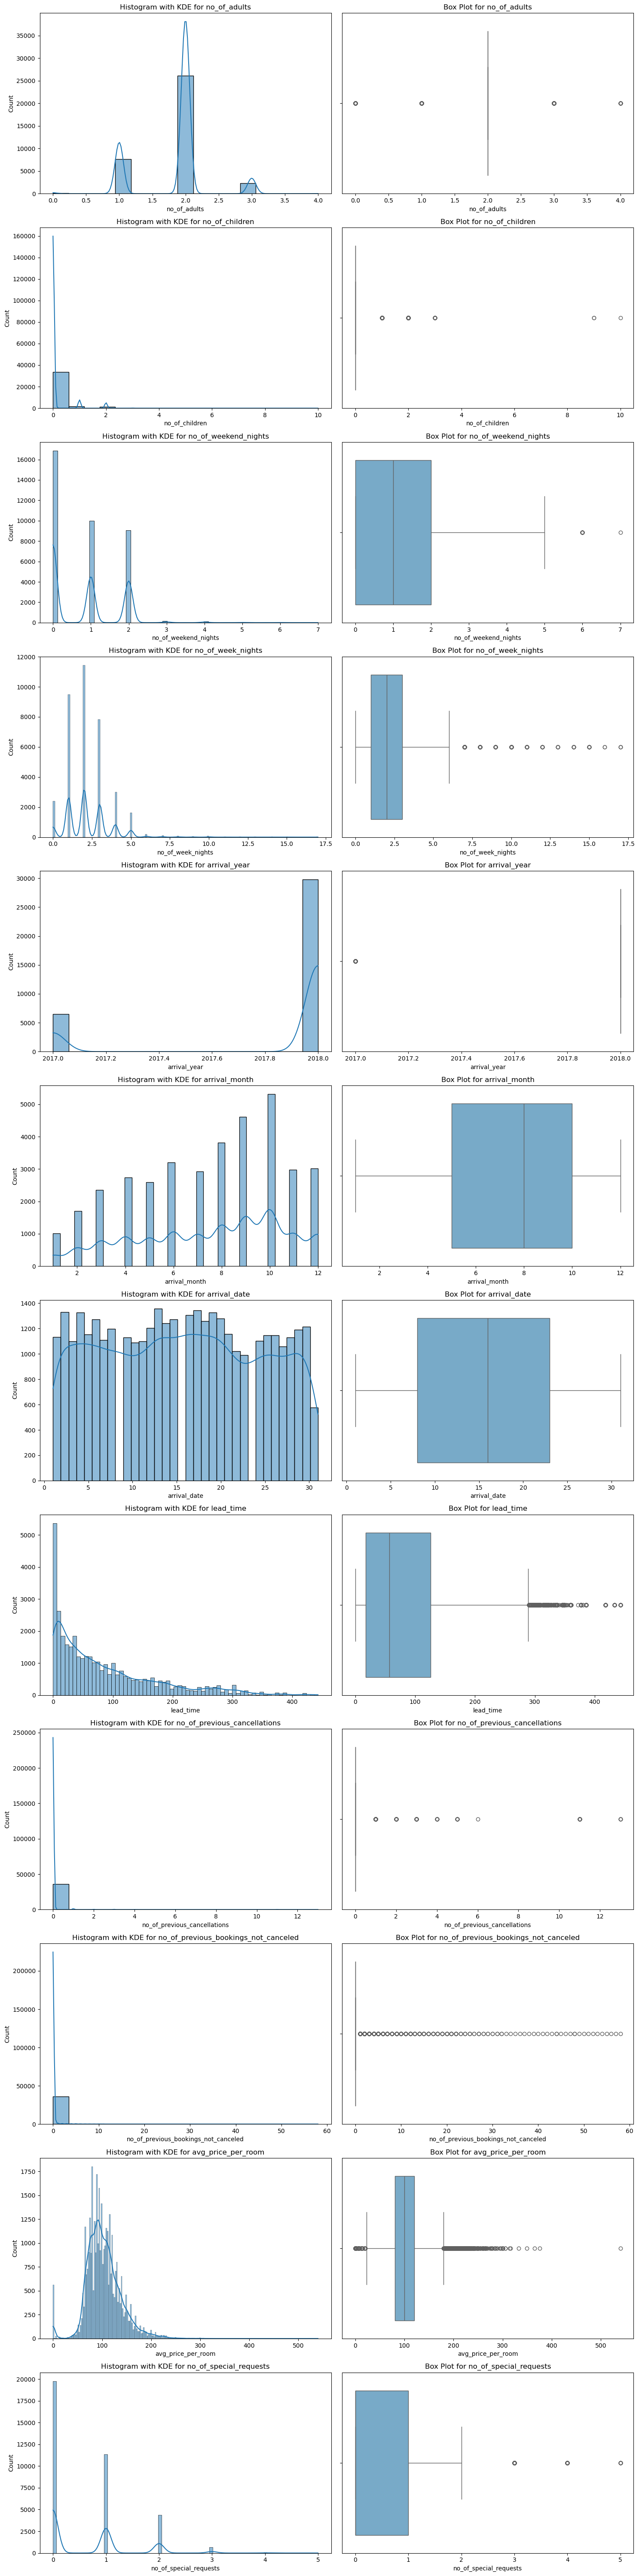

In [282]:
num_plot_dist(df, num_cols)

### **Анализ основных числовых признаков**
1. **no_of_adults** (Количество взрослых)
Вывод: Бронирования с двумя взрослыми — самые популярные. Меньше всего бронирований с одним взрослым или без взрослых. Это может быть полезно при анализе моделей поведения гостей, чтобы прогнозировать отмены для бронирований с большим количеством людей, поскольку такие группы могут быть более склонны к отмене.
2. **no_of_children** (Количество детей)
Вывод: Большинство бронирований не включает детей. Это может быть связано с особенностями путешествий, где семьи с детьми реже отменяют свои бронирования, так как такие поездки чаще планируются заранее. Для улучшения прогнозирования отмен стоит обратить внимание на бронирования, где указано большое количество детей.
3. **no_of_weekend_nights** (Количество ночей на выходных)
Вывод: Большинство клиентов бронируют 0 или 1 ночь на выходных. Это может означать, что большинство гостей предпочитают отдых в будние дни. Отели могут рассмотреть предложение специальных условий или скидок для бронирований, включающих выходные ночи, чтобы уменьшить отмены, предлагая выгодные условия для таких бронирований.
4. **no_of_week_nights** (Количество ночей в течение недели)
Вывод: Переобладание бронирований на 2 ночи может свидетельствовать о том, что клиенты склонны к краткосрочным бронированиям. Бронирования на более длинные периоды могут быть подвержены отменам. Отели могут предложить скидки или бонусы для более долгосрочных бронирований, чтобы уменьшить вероятность отмен.
6. **arrival_month** (Месяц прибытия)
Вывод: Октябрь, сентябрь и август — самые популярные месяцы для прибытия. Отели могут предложить стимулы или акции в эти месяцы, чтобы снизить вероятность отмен в пиковые сезоны, а также сконцентрироваться на увеличении стабильности бронирований в менее популярные месяцы.
7. **lead_time** (Время до прибытия)
Вывод: Бронирования с коротким сроком до прибытия (0-4 дня) наиболее распространены. Это может указывать на высокий риск отмены для таких бронирований. Отели могут предложить дополнительные гарантии или скидки для гостей, подтверждающих бронирование за более длительный срок.
8. **no_of_previous_cancellations** (Количество предыдущих отмен)
Вывод: Гости с предыдущими отменами имеют более высокий риск отмены бронирования. Отели могут предоставить особые условия для таких клиентов или повысить уровень гарантии для уменьшения вероятности повторных отмен.
9. **no_of_previous_bookings_not_canceled** (Количество предыдущих бронирований без отмен)
Вывод: Гости с большим количеством успешных бронирований без отмен склонны меньше отменять новые бронирования. Это может быть важным показателем при прогнозировании отмен и разработке программ лояльности, направленных на таких клиентов.
10. **avg_price_per_room** (Средняя цена за номер)
Вывод: Цена номера сильно варьируется. Более высокие цены могут быть связаны с более высоким риском отмены, особенно если клиенты чувствуют, что могут найти лучшие предложения в другом месте. Отели могут предложить скидки или акции, чтобы уменьшить отмены для более дорогих номеров.
11. **no_of_special_requests** (Количество специальных запросов)
Вывод: Большинство гостей не делает специальных запросов. Однако, для бронирований с большими специальными запросами стоит предусмотреть дополнительные проверки, так как они могут быть связаны с особым вниманием к удобствам или требованиям, которые могут увеличить вероятность отмены.

## Cat Feature

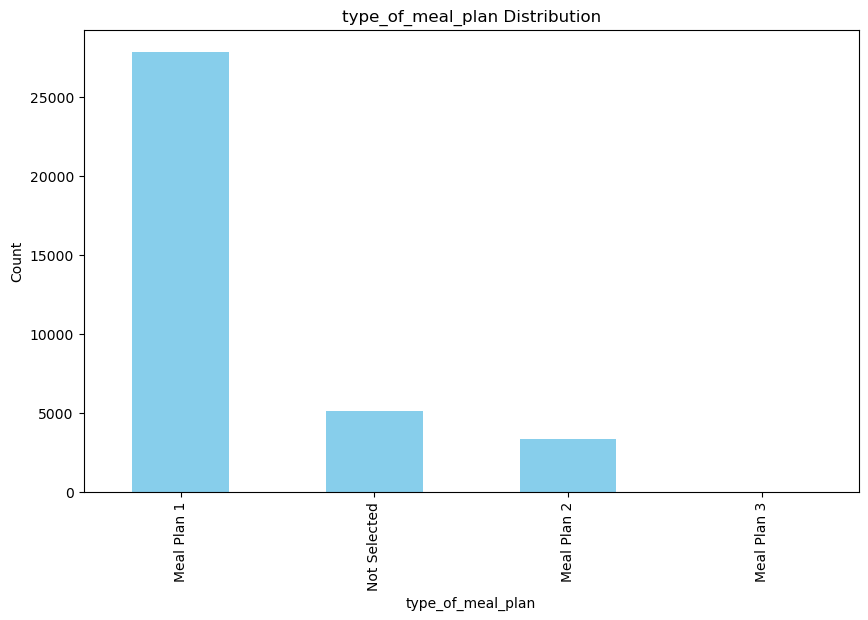

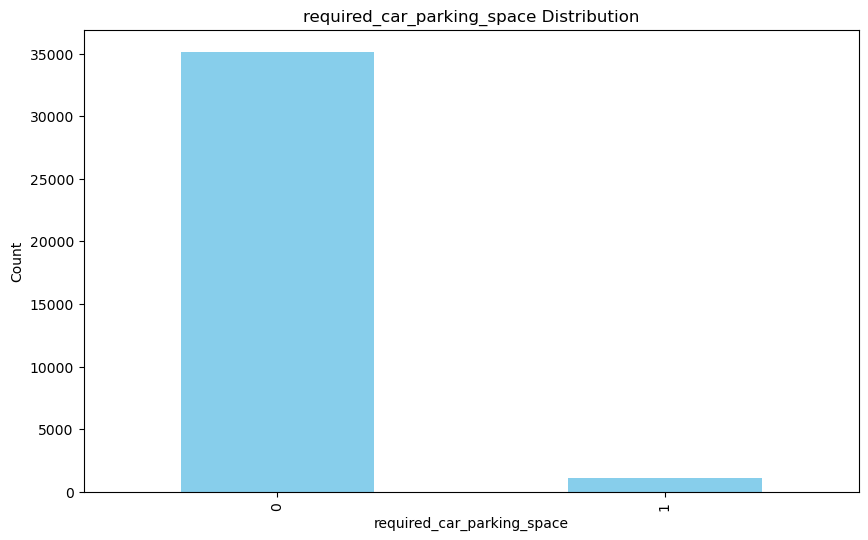

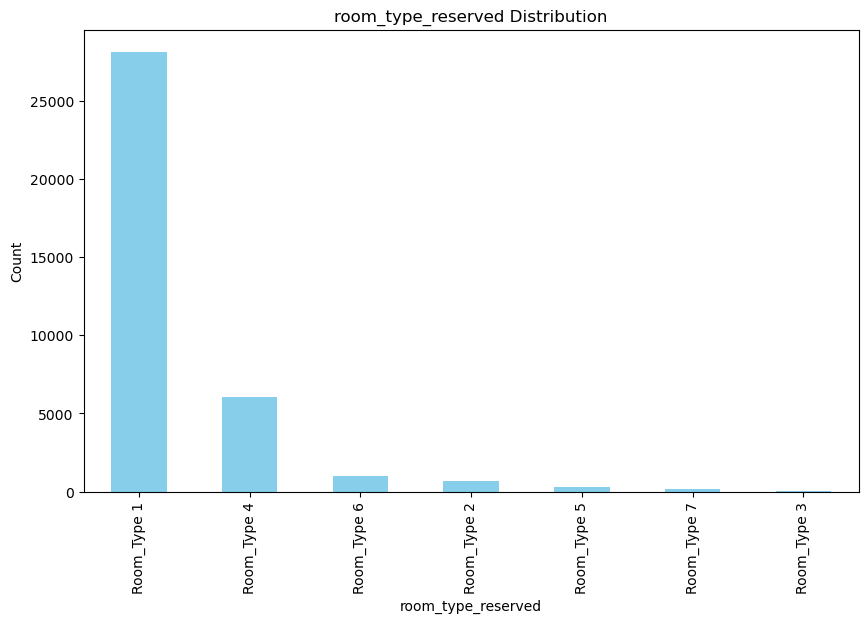

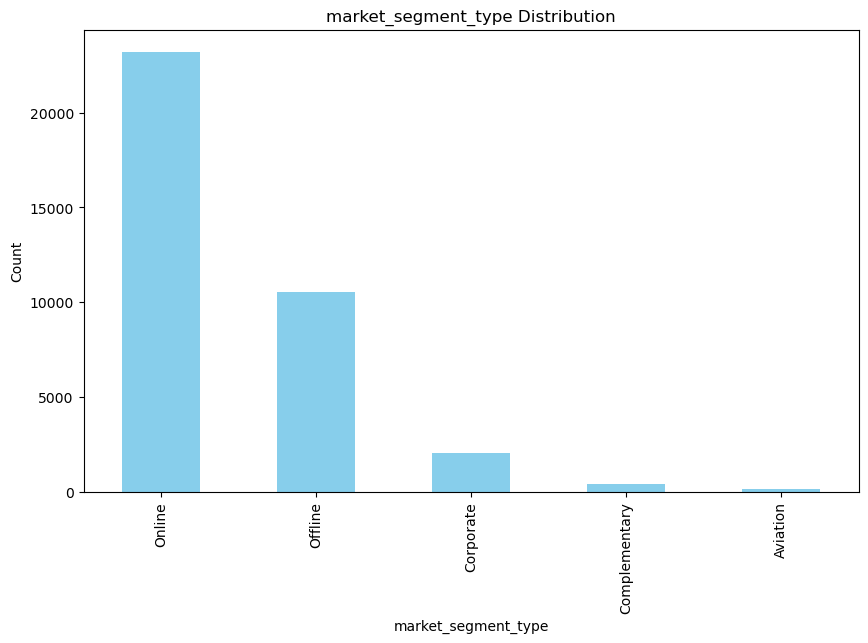

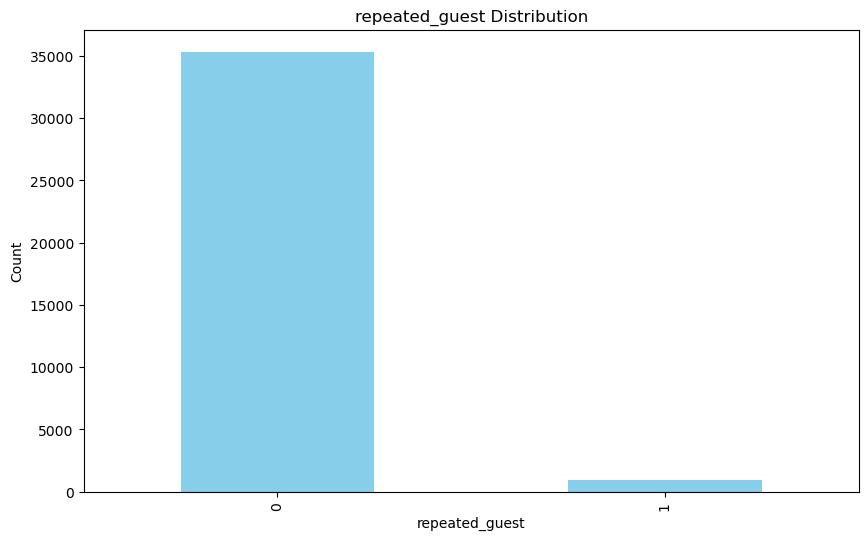

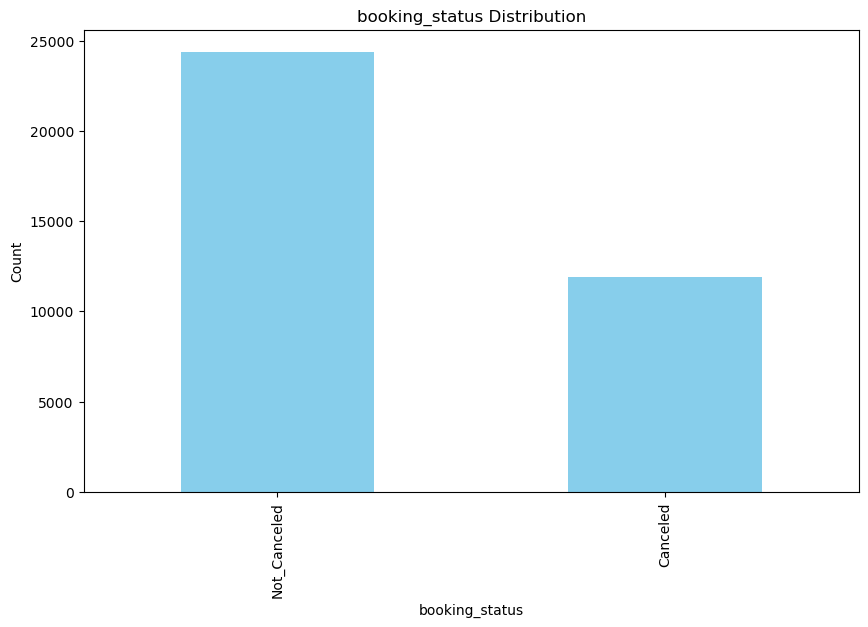

In [285]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        df[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()

1. **type_of_meal_plan** (Тип плана питания)
Наибольшее количество бронирований связано с планом питания Meal Plan 1, однако несколько вариантов питания присутствуют в меньших количествах.
Признак может быть важным для предсказания отмены, поскольку наличие плана питания может увеличивать вероятность изменения планов гостей.
3. **required_car_parking_space** (Необходимость парковочного места)
Большинство гостей не требуют парковочного места, однако есть категория клиентов, которым оно необходимо.
Клиенты с требованием парковки могут быть менее склонны к отменам, и это стоит учитывать для прогноза.
4. **room_type_reserved** (Тип забронированного номера)
Преобладает тип номера Room_Type 1, в то время как другие типы номеров бронируются гораздо реже.
Тип номера может влиять на вероятность отмены — более популярные номера могут быть менее подвержены отменам.
5. **market_segment_type** (Тип сегмента рынка)
Бронирования через онлайн-каналы преобладают.
Онлайн-сегмент может иметь более высокую вероятность отмены бронирования. Это важно для предсказания отмен и для предложения специальных условий.
6. **repeated_guest** (Повторный гость)
Повторных гостей значительно меньше, чем новых, и они, вероятно, менее склонны к отмене.
Повторные гости имеют меньшую вероятность отмены. Это может помочь отелям предложить специальные предложения для повторных клиентов.
7. **booking_status** (Статус бронирования)
Признак с чётким разделением на отменённые и не отменённые бронирования.
Это целевая переменная для модели, где важнейшие признаки, такие как тип номера и план питания, могут повлиять на вероятность отмены.

In [287]:
def plot_box_target(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2  
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f'{column} vs {target}')
    
    plt.tight_layout()
    plt.show()

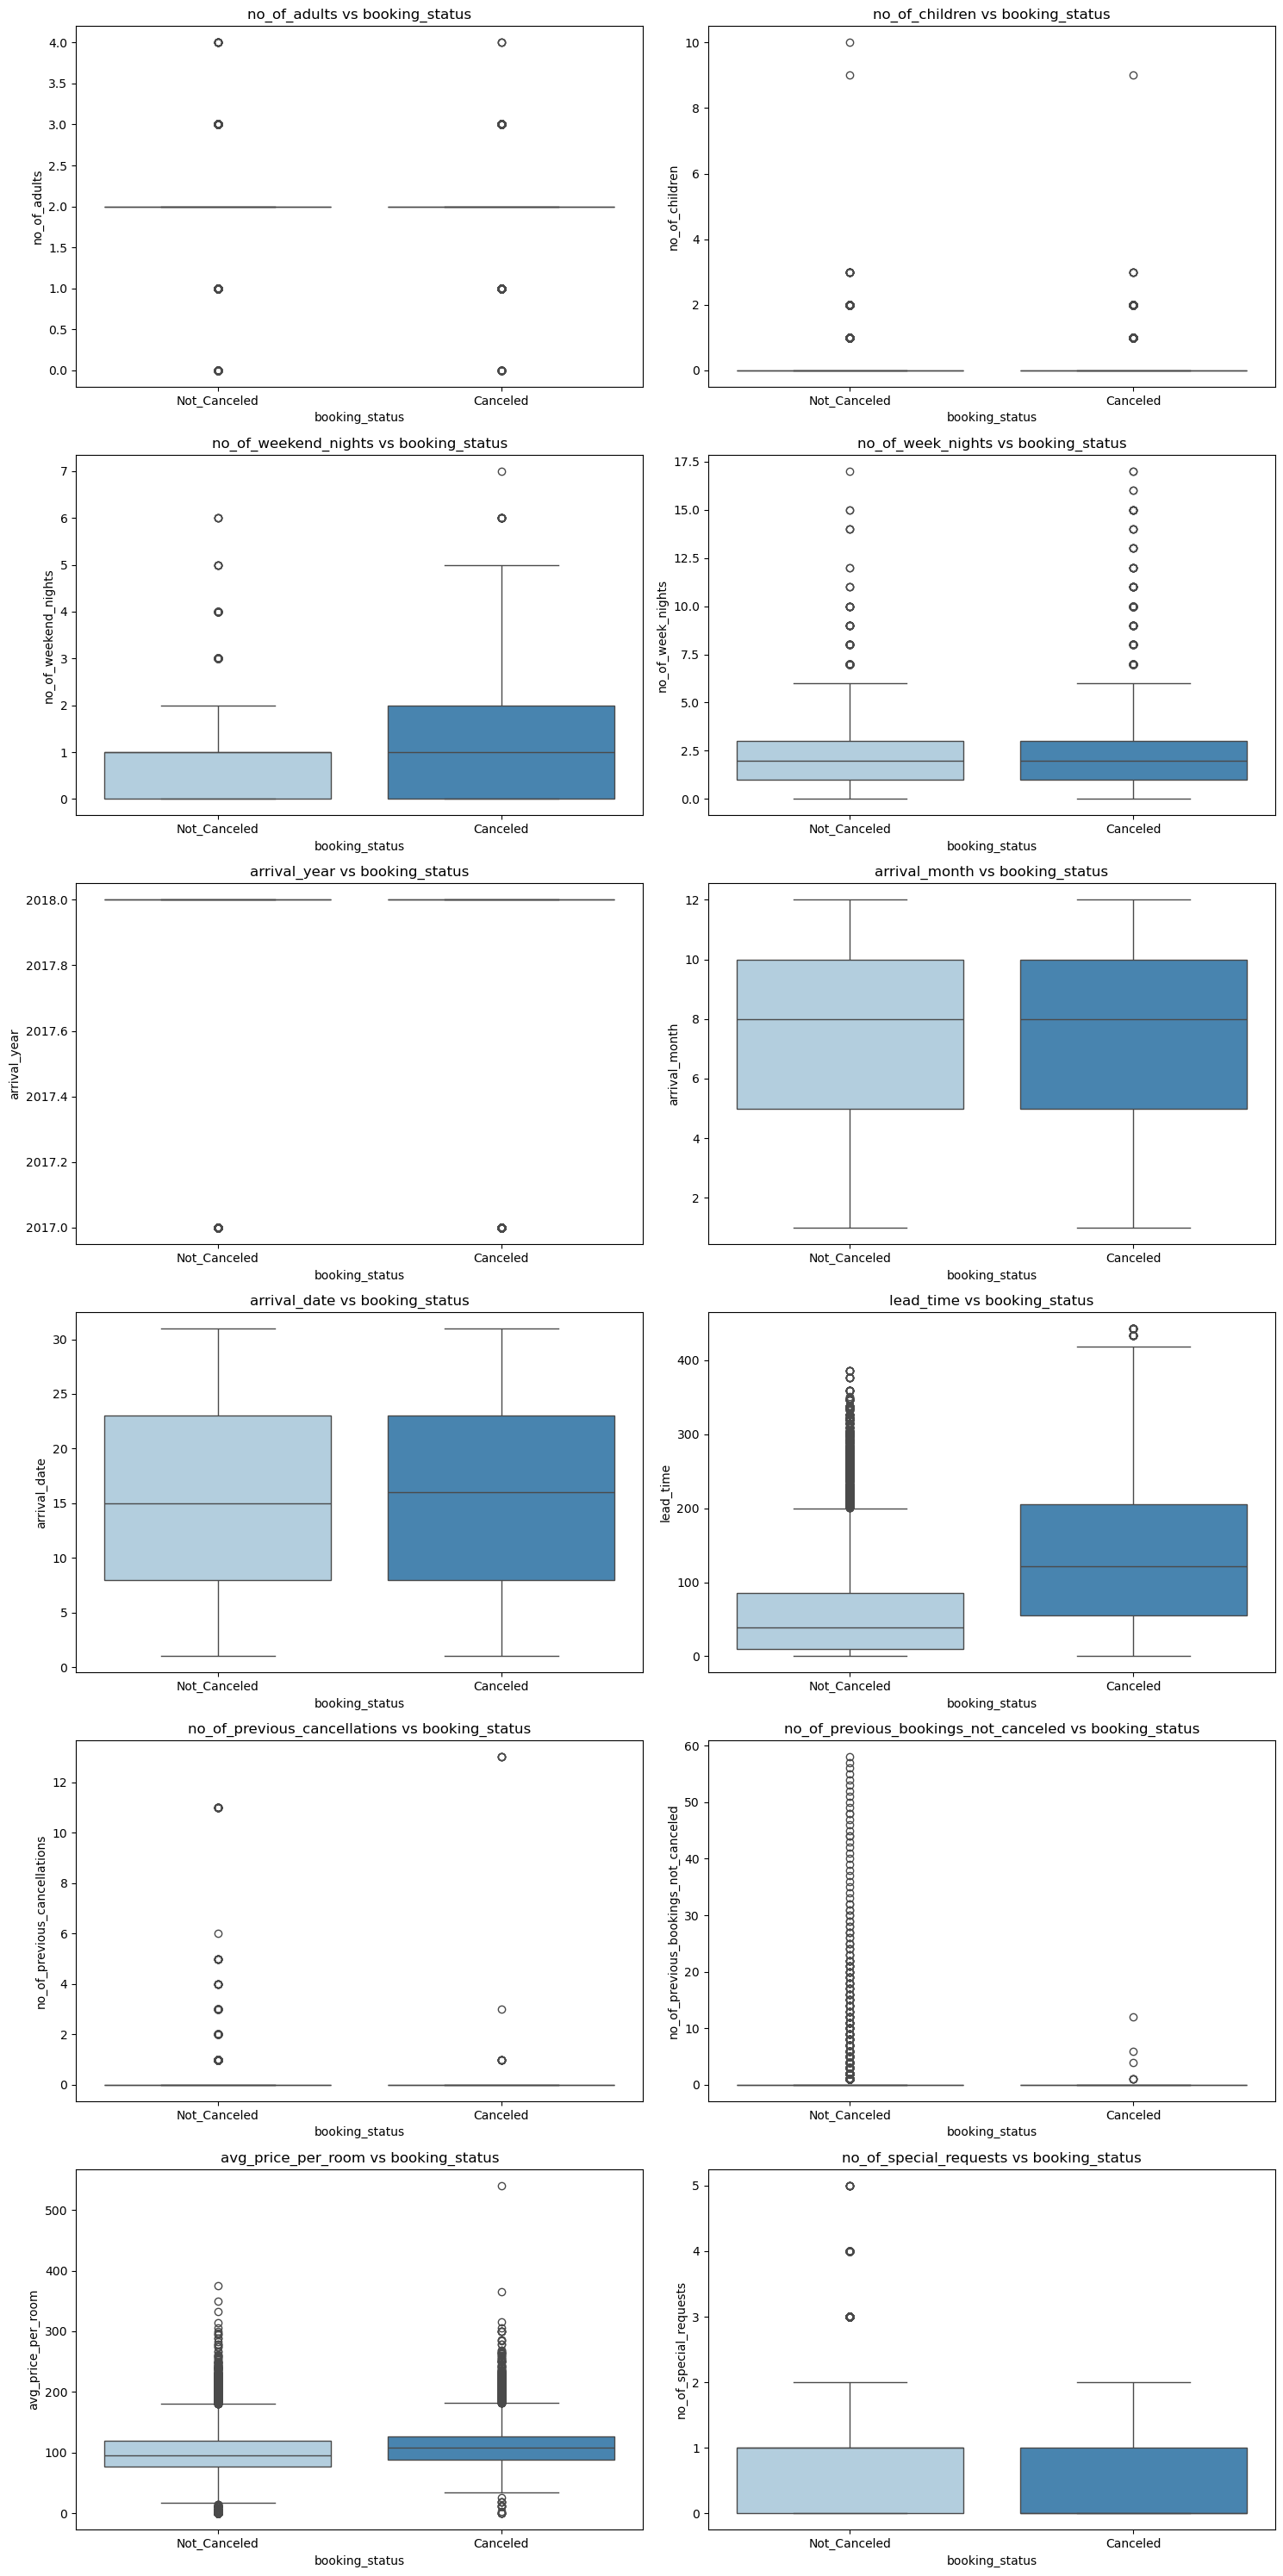

In [288]:
plot_box_target(df, 'booking_status', num_cols)

Количество взрослых и детей: эти функции показывают схожие распределения для отмененных и неотмененных бронирований, что указывает на то, что они не являются сильными предикторами отмены.

Количество выходных и будних ночей: оба показывают схожие распределения для отмененных и неотмененных бронирований, что указывает на то, что они не являются значительными предикторами отмены.

Время выполнения: отмененные бронирования, как правило, имеют более длительное время выполнения, что подразумевает, что более длительные горизонты бронирования могут коррелировать с более высоким риском отмены.

Предыдущие отмены: клиенты с историей отмен с большей вероятностью отменят снова, что делает прошлые отмены сильным предиктором будущих отмен.

Предыдущие неотмененные бронирования: клиенты с большим количеством неотмененных бронирований с меньшей вероятностью отменят, что указывает на то, что прошлые неотмены являются хорошим предиктором будущего поведения.

Количество особых запросов: количество особых запросов мало влияет на показатели отмены, что указывает на то, что оно не является ключевым предиктором отмен.

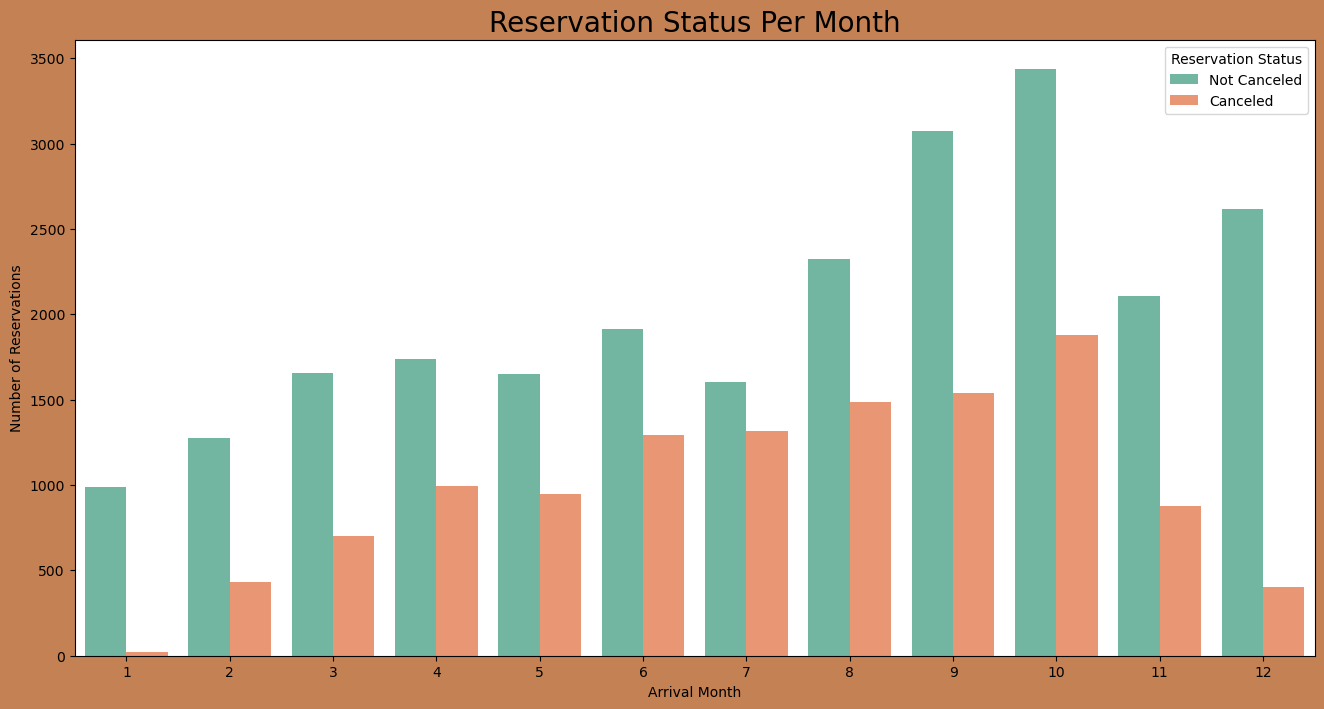

In [290]:
plt.figure(figsize=(16,8), facecolor='#C38154')
ax1 = sns.countplot(x='arrival_month', hue='booking_status', data=df, palette='Set2')
plt.title('Reservation Status Per Month', size=20)
plt.xlabel('Arrival Month')
plt.ylabel('Number of Reservations')

plt.legend(title="Reservation Status", labels=['Not Canceled', 'Canceled'])

plt.show()

Создал сгруппированную столбчатую диаграмму для изучения месяцев с самыми высокими и самыми низкими уровнями бронирования на основе их статуса. Очевидно, что выделяется сентябрь и октябрь, имеющие наибольшее количество как подтвержденных, так и отмененных бронирований. Напротив, в январе наименьшее количество подтвержденных бронирований, но наибольшее количество отмененных бронирований.

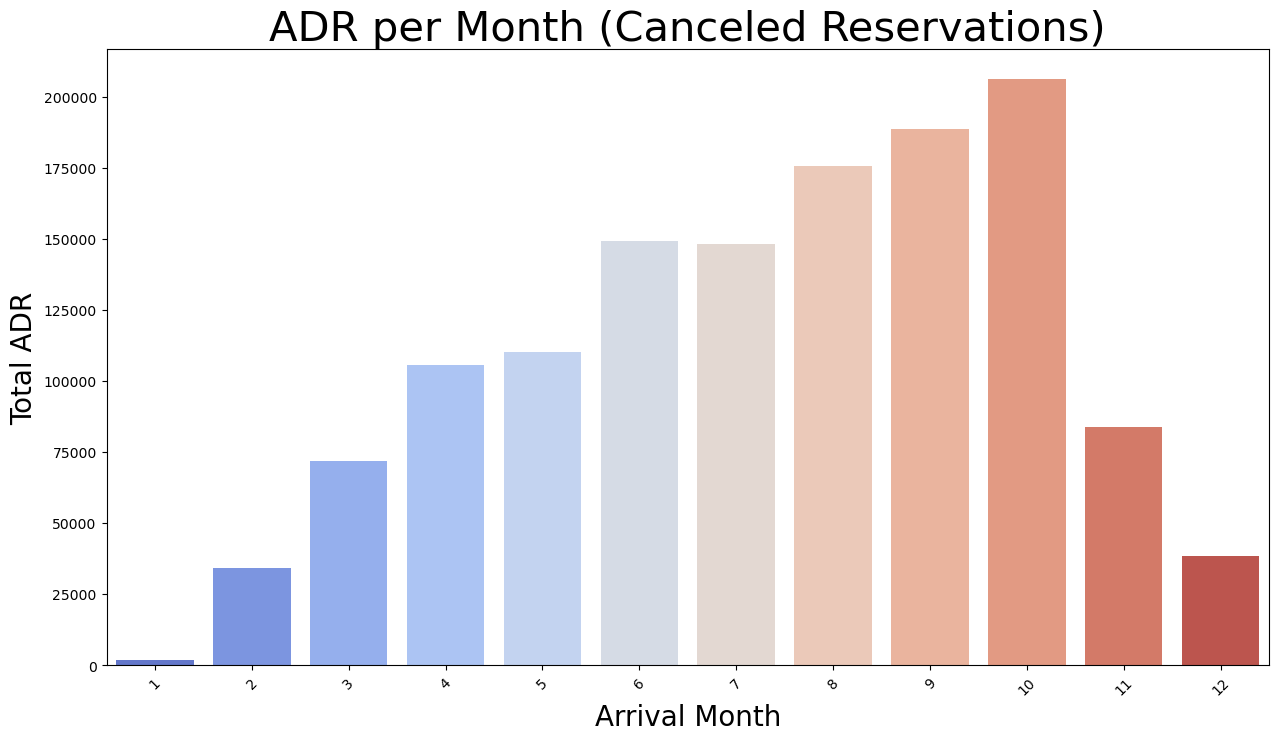

In [292]:
plt.figure(figsize=(15,8))
plt.title('ADR per Month (Canceled Reservations)', fontsize=30)

# Фильтруем данные по отменённым бронированиям и группируем по месяцам
data = df[df['booking_status'] == 'Canceled'].groupby('arrival_month')['avg_price_per_room'].sum().reset_index()

# Строим столбчатую диаграмму с ADR по месяцам
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data, palette='coolwarm')

# Настройка осей и заголовков
plt.xlabel('Arrival Month', fontsize=20)
plt.ylabel('Total ADR', fontsize=20)

# Показываем график
plt.xticks(rotation=45)
plt.show()

В августе, сентябре и октябре наблюдается высокий Total ADR, что может свидетельствовать о пиковом туристическом спросе в эти месяцы. Однако высокие цены могут приводить к большему числу отмен бронирований, так как гости могут пересматривать свои планы. Это сигнализирует о необходимости пересмотра ценовой политики в пиковый сезон для снижения количества отмен, возможно, путем предложения скидок или гибких условий бронирования.

In [294]:
def plot_cat_features_with_target(df, target, cat_features):
    num_features = len(cat_features)

    num_row = (num_features + 1) // 2

    fig, axes = plt.subplots(num_row, 2, figsize=(12, num_row * 5))
    
    
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

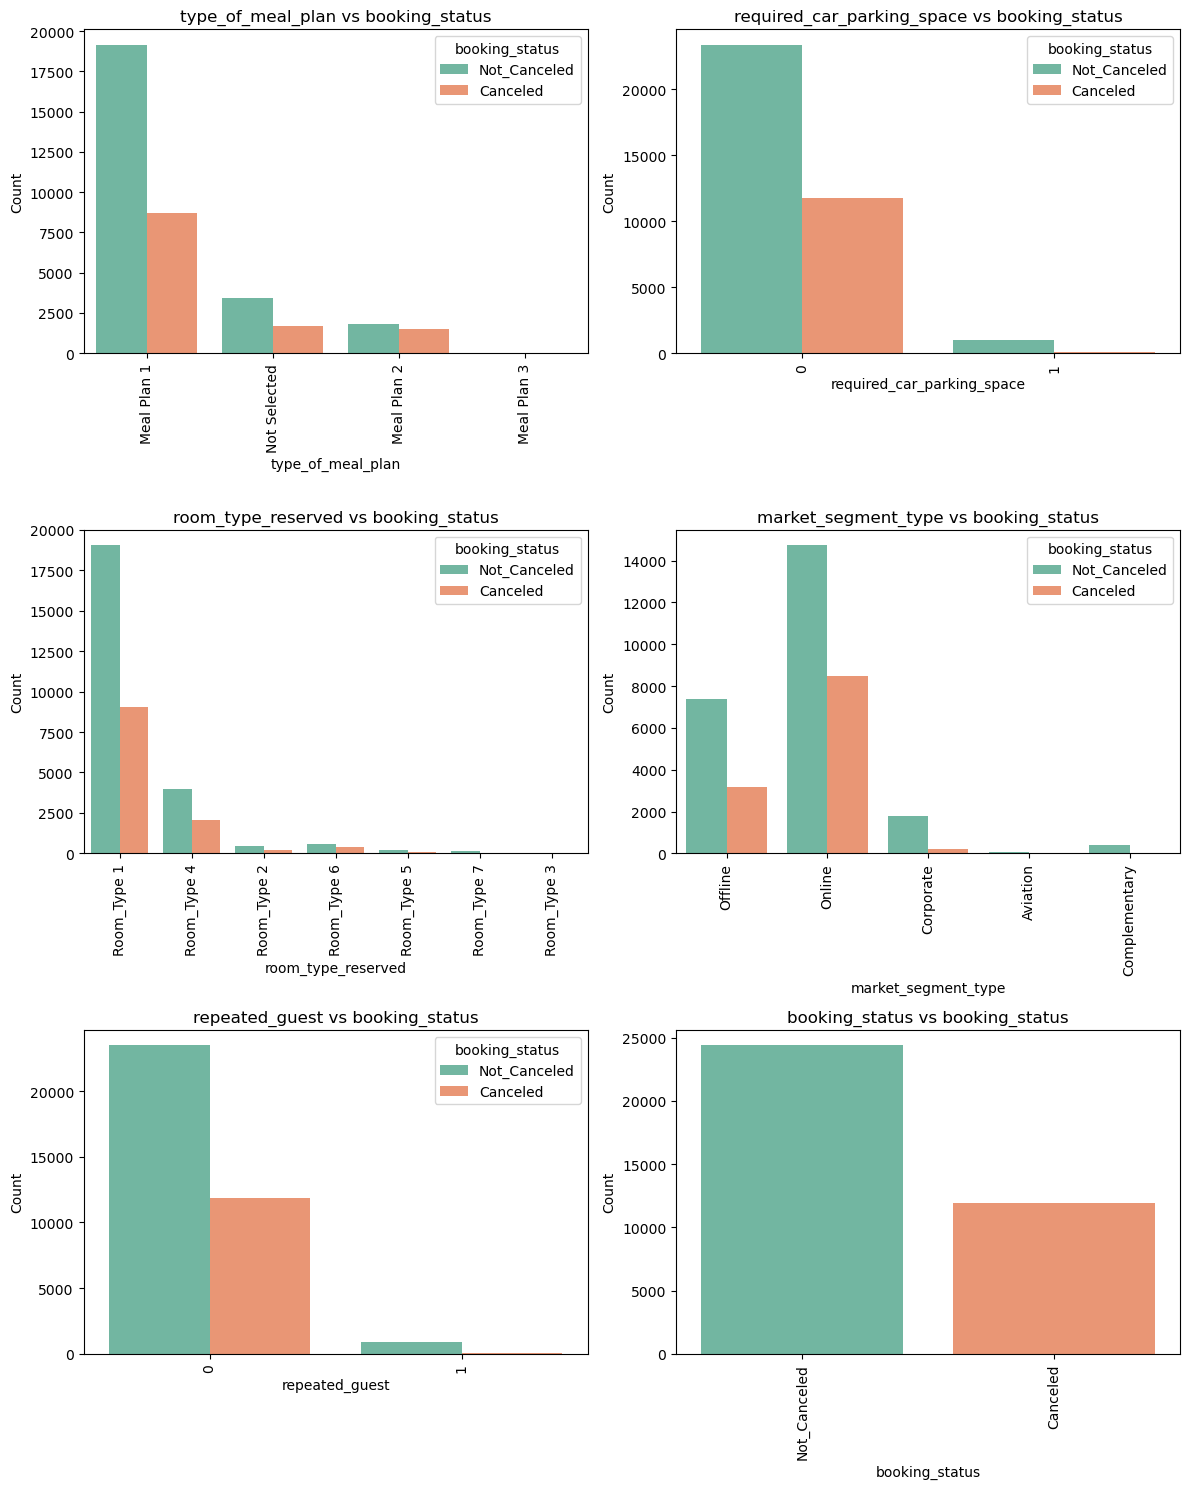

In [295]:
plot_cat_features_with_target(df, 'booking_status', cat_cols)

### Статистика отмены бронирования
*   **type_of_meal_plan:** клиенты, выбравшие «Не выбрано» для своего плана питания, имеют более низкий уровень отмены по сравнению с теми, кто выбрал определенный план питания.

*   **required_car_parking_space:** гости, которым требуются парковочные места, как правило, не отменяют свои бронирования так часто, как те, кому не требуются парковочные места.

*   **room_type_reserved:** «Тип номера 1» имеет самый высокий уровень отмены.

*   **market_segment_type:**  «Дополнительные» бронирования имеют очень низкий уровень отмены, в то время как «Онлайн» бронирования, как правило, имеют более высокий уровень отмены по сравнению с офлайн-бронированиями, возможно, из-за простоты отмены, сравнения цен или гибкой политики.

* **repeated_guest:** повторные гости имеют более высокий уровень отмены по сравнению с гостями, приехавшими впервые.

**Предворительный вывод:** Гибкость в условиях бронирования (например, выбор питания или онлайн-бронирования) и отсутствие дополнительных обязательств (например, парковки) могут способствовать более высокой вероятности отмены.

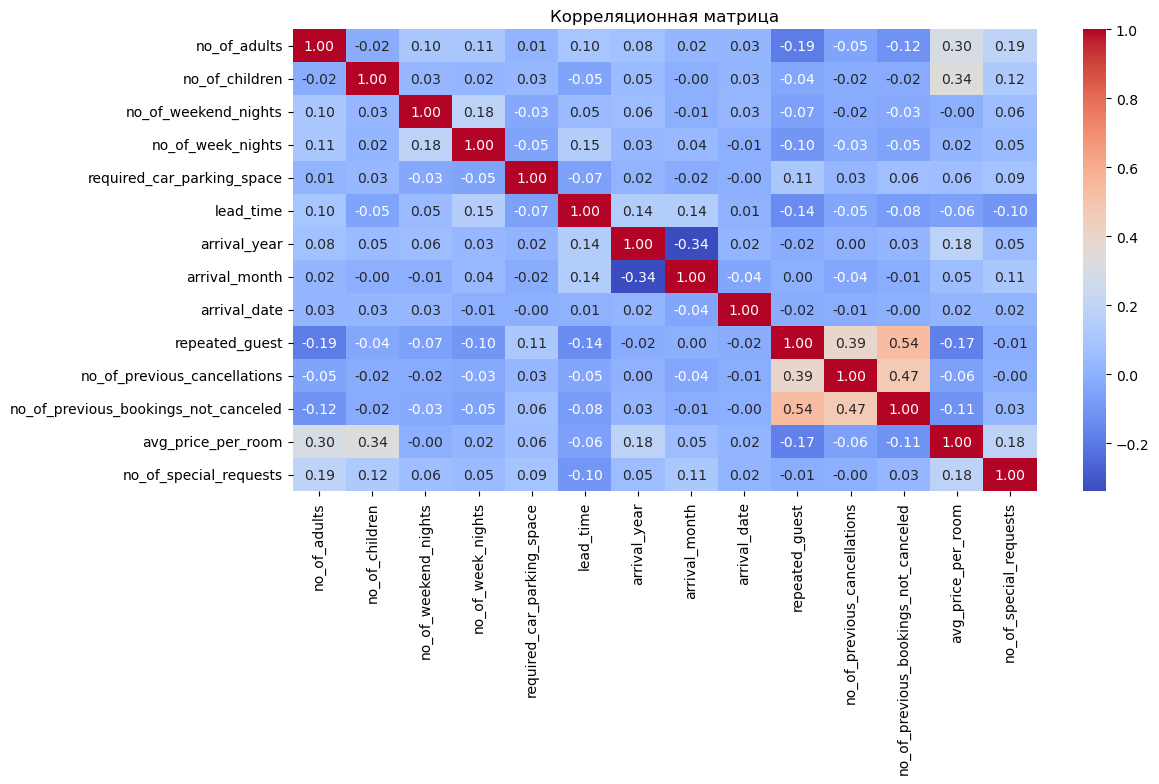

In [297]:
# Корреляционная матрица
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

### Основной вывод по корреляционной матрице:
*   Признаки, связанные с количеством ночей, запросами на парковку и предыдущими отменами, имеют более значимые корреляции, что может помочь в модели предсказания отмен.
*   Признаки, связанные с датами, не показывают сильных взаимосвязей с другими признаками, что может указывать на их меньшую важность при анализе отмен бронирований.
*   Корреляция между количеством предыдущих отмен и количеством предыдущих неотмененных бронирований особенно высока, что свидетельствует о том, что эти признаки важны для понимания повторяющихся паттернов отмен.

In [299]:
# Сразу заменю значения в 'booking_status' на 0 и 1
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [300]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_with_target = df[numerical_columns].corr()['booking_status'].abs().sort_values(ascending=False)
print(correlation_with_target)

booking_status                          1.000000
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
repeated_guest                          0.107287
no_of_week_nights                       0.092996
no_of_adults                            0.086920
required_car_parking_space              0.086185
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
arrival_month                           0.011233
arrival_date                            0.010629
Name: booking_status, dtype: float64


### Общий вывод:
*   lead_time, special requests оказывают наибольшее влияние на вероятность отмены бронирования, что может быть использовано для предсказания отмен в модели.
*   Признаки, такие как no_of_children и arrival_date, имеют очень слабую связь с отменами, и они могут быть менее полезными для предсказания.
*   Высокая цена номера и определенные условия, такие как запросы на парковку, могут указывать на более высокую вероятность отмены, что важно учитывать при разработке политики отелей.

# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF6347;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> Data Pre-processing 🛠️ </p>

In [303]:
df.duplicated().sum()

0

In [304]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [305]:
# Удаляем колонку 'Booking_ID', так как она не влияет на предсказания
df = df.drop(columns=['Booking_ID'])

# Кодируем категориальные признаки с помощью LabelEncoder
label_encoder = LabelEncoder()

df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])

# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['booking_status', 'arrival_year', 'arrival_date'], axis=1)
y = df['booking_status']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабируем числовые признаки
scaler = StandardScaler()

numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print(f"Обработанные данные:\n{X_train.head()}")
X_train.head()

Обработанные данные:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
11731      0.298918        -0.26463              1.362393          -0.141380   
35609      0.298918        -0.26463              0.214274           1.278289   
21639      0.298918        -0.26463              1.362393           1.988124   
24432     -1.626204        -0.26463             -0.933846           0.568455   
31975      0.298918        -0.26463              0.214274          -0.141380   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
11731                  0                   -0.180943                   0   
35609                  0                   -0.180943                   0   
21639                  0                   -0.180943                   0   
24432                  0                   -0.180943                   0   
31975                  0                   -0.180943                   0   

       lead_time  arrival_month  market_s

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
11731,0.298918,-0.26463,1.362393,-0.141380,0,-0.180943,0,-0.921571,1.492556,3,-0.164323,-0.063684,-0.089459,-1.009423,-0.789293
35609,0.298918,-0.26463,0.214274,1.278289,0,-0.180943,0,0.728984,1.492556,3,-0.164323,-0.063684,-0.089459,-1.037878,-0.789293
21639,0.298918,-0.26463,1.362393,1.988124,0,-0.180943,0,1.275294,-0.137542,4,-0.164323,-0.063684,-0.089459,-0.356376,0.483859
24432,-1.626204,-0.26463,-0.933846,0.568455,0,-0.180943,0,0.089685,0.840517,4,-0.164323,-0.063684,-0.089459,0.282443,3.030164
31975,0.298918,-0.26463,0.214274,-0.141380,0,-0.180943,0,2.553892,1.166536,3,-0.164323,-0.063684,-0.089459,-0.411864,-0.789293


# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF8C00;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> Baseline (Базовая модель и метрика) 📊 </p>

In [307]:
# Использование KNN в качестве базовой модели
knn_baseline = KNeighborsClassifier(n_neighbors=3, n_jobs=1)

knn_baseline.fit(X_train, y_train)

y_baseline_pred = knn_baseline.predict(X_test)
y_baseline_proba = knn_baseline.predict_proba(X_test)[:, 1]

report_knn_baseline = classification_report(y_test, y_baseline_pred)

print(f"Baseline ROC-AUC: {roc_auc_score(y_test, y_baseline_proba):.4f}")
print(report_knn_baseline)

Baseline ROC-AUC: 0.8922
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4878
           1       0.80      0.77      0.78      2377

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255



# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#008080;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> 🔄 Modeling 🤖 </p>

In [309]:
# Словарь моделей
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42)
}

# Обучение моделей без подбора гиперпараметров
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC Train": roc_auc_train,
        "ROC-AUC Test": roc_auc_test
    })
    
# Выбор лучшей модели
results_df = pd.DataFrame(results)
best_model_name = results_df.sort_values(by='ROC-AUC Test', ascending=False).iloc[0]['Model']
print(f"Лучшей моделью является: {best_model_name}")
results_df

Лучшей моделью является: Random Forest


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Train,ROC-AUC Test
0,K-Nearest Neighbors,0.859545,0.796507,0.767354,0.781658,0.973847,0.892167
1,Logistic Regression,0.808959,0.752420,0.621371,0.680645,0.853325,0.862700
2,Decision Tree,0.866023,0.790409,0.804375,0.797331,0.999864,0.851718
3,Random Forest,0.901309,0.884313,0.803955,0.842221,0.999335,0.955262
4,XGBoost,0.894693,0.867761,0.800589,0.832823,0.972670,0.952377
5,CatBoost,0.890696,0.868372,0.785444,0.824829,0.965944,0.951390
6,LightGBM,0.891799,0.869545,0.787968,0.826749,0.957305,0.950912


In [310]:
# # Подбор гиперпараметров для лучшей модели
# param_grid = {
#     "n_estimators": [100, 300],
#     "max_depth": [3, 5, 7, 10],
#     "min_samples_leaf": [1, 2, 4, 5],
#     "max_features": ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, scoring='roc_auc')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# y_pred_train = best_model.predict(X_train)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc_train = roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])
# roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# results_df = pd.DataFrame([{
#     "Model": "RandomForest",
#     "Accuracy": accuracy,
#     "Precision": precision,
#     "Recall": recall,
#     "F1-Score": f1,
#     "ROC-AUC Train": roc_auc_train,
#     "ROC-AUC Test": roc_auc_test
# }])

# print("\nЛучшие параметры модели:", grid_search.best_params_)
# results_df

**Лучшие параметры модели:**
*   'max_depth': 10 - дальнейшее увеличение приводит к переобучению
*   'max_features': 'sqrt',
*   'min_samples_leaf': 1,
*   'n_estimators': 300 - дальнейшее увеличение приводит к переобучению

In [312]:
# Обучим модель Random Forest на лучших параметрах
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10,
                                  min_samples_leaf=1, n_estimators=300, max_features='sqrt')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_train = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

results_model = pd.DataFrame([{
    "Model": "RandomForest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC Train": roc_auc_train,
    "ROC-AUC Test": roc_auc_test
}])
results_model

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Train,ROC-AUC Test
0,RandomForest,0.870296,0.788585,0.82541,0.806578,0.940865,0.936636


## Feature Importance

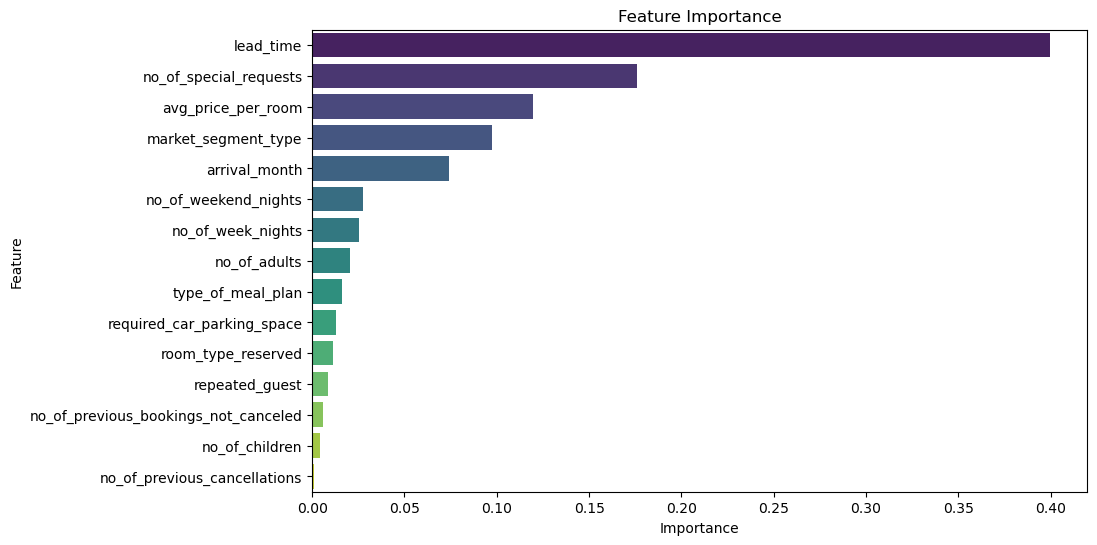

In [314]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

*   Lead time (время до заезда) является наиболее важным фактором. Это подтверждается тем, что более ранние бронирования могут иметь более высокую вероятность отмены, поскольку клиенты могут изменить планы или забыть о бронировании.
*   Special requests и Price тоже оказывают влияние на вероятность отмены, с тем, что клиенты с дополнительными запросами или более дорогими номерами более чувствительны к изменениям.
*   Тип клиента и сезонность также имеют значимость, но в меньшей степени.
*   Признаки, такие как количество ночей и демографическая информация, оказывают незначительное влияние на решение о отмене бронирования.

In [316]:
feature_importances

lead_time                               0.399718
no_of_special_requests                  0.176154
avg_price_per_room                      0.119848
market_segment_type                     0.097185
arrival_month                           0.074046
no_of_weekend_nights                    0.027323
no_of_week_nights                       0.025260
no_of_adults                            0.020464
type_of_meal_plan                       0.015903
required_car_parking_space              0.013090
room_type_reserved                      0.011215
repeated_guest                          0.008527
no_of_previous_bookings_not_canceled    0.006019
no_of_children                          0.004130
no_of_previous_cancellations            0.001118
dtype: float64